# Library yang digunakan

In [2]:
import pandas as pd
import numpy as np

# library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk analisis time Series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# library untuk forecasting
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Import Dataset

In [3]:
df = pd.read_excel('emisi_co2_indonesia_new.xlsx')

### Deskripsi Dataset

In [4]:
df.head()

,year,CO2
0,1960,0.243805
1,1961,0.288720
2,1962,0.248447
3,1963,0.239681
4,1964,0.229361


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    61 non-null     int64  
 1   CO2     61 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [7]:
df.duplicated().any()

False

### Transform Dataset

In [9]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [10]:
df.set_index(['year'], inplace=True)

In [11]:
df.head()

,CO2
year,
1960-01-01,0.243805
1961-01-01,0.288720
1962-01-01,0.248447
1963-01-01,0.239681
1964-01-01,0.229361


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 1960-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     61 non-null     float64
dtypes: float64(1)
memory usage: 976.0 bytes


In [13]:
df.index.min(), df.index.max()

(Timestamp('1960-01-01 00:00:00'), Timestamp('2020-01-01 00:00:00'))

# Analisa Time Series

<Axes: xlabel='year'>

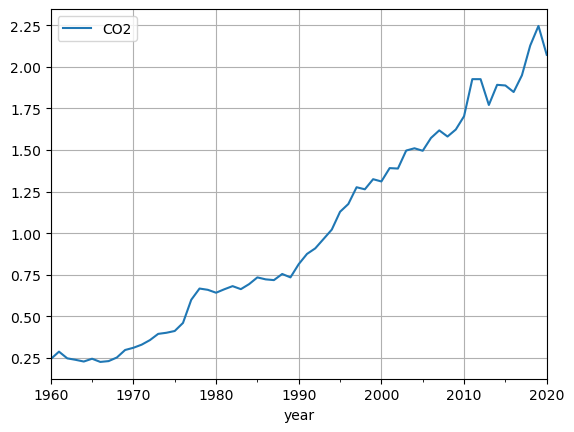

In [14]:
df.plot(grid=True)

In [15]:
train_df = df.loc[:'2002-01-01']
test_df = df.loc['2003-01-01':]

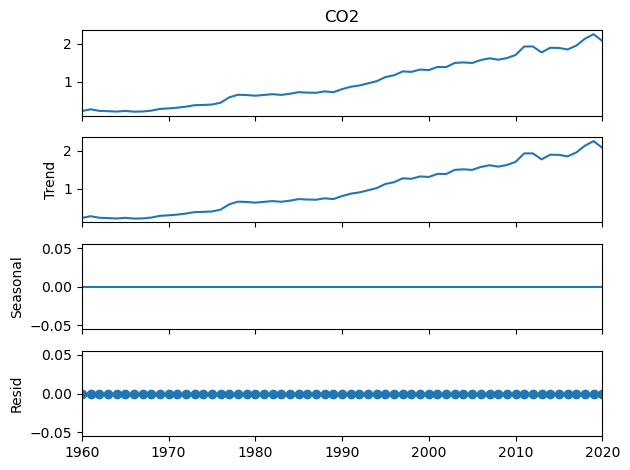

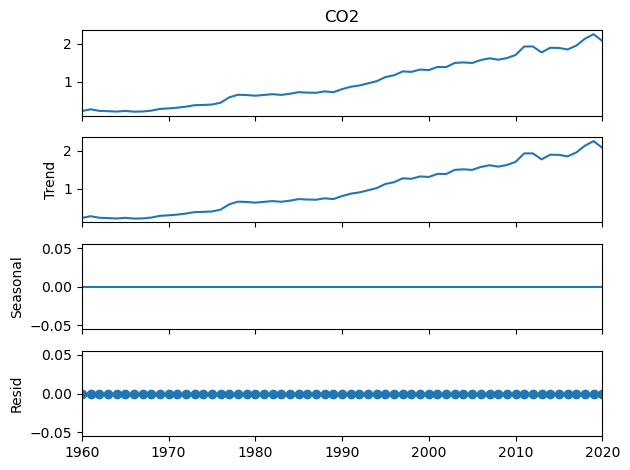

In [16]:
decompose_add = seasonal_decompose(df['CO2'])
decompose_add.plot()

In [18]:
def adf_test(timeseries):
    print('The Result of testing Dickey-Fuller')
    print('--------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observation Used'])
    for key, Value in adftest[4].items():
        adf_output['Critical Value (%s)' %key] = Value
    print(adf_output)

adf_test(df.values)

The Result of testing Dickey-Fuller
--------------------------------
Test Statistic                 0.898508
p-value                        0.993071
Lags Used                     10.000000
Number of Observation Used    50.000000
Critical Value (1%)           -3.568486
Critical Value (5%)           -2.921360
Critical Value (10%)          -2.598662
dtype: float64


In [19]:
diff_df = df.diff()
diff_df.head()

,CO2
year,
1960-01-01,NaN
1961-01-01,0.044915
1962-01-01,-0.040273
1963-01-01,-0.008766
1964-01-01,-0.010320


In [20]:
diff_df.dropna(inplace=True)

<Axes: xlabel='year'>

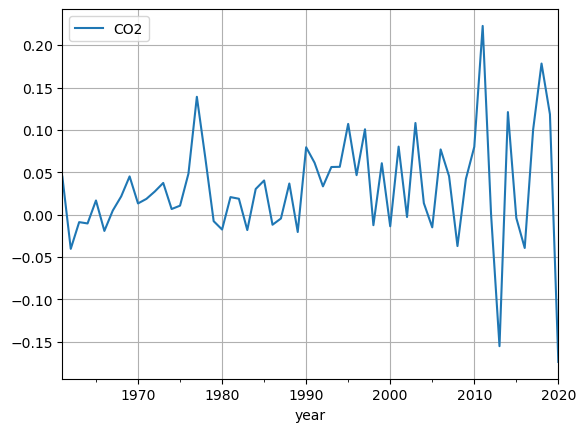

In [21]:
diff_df.plot(grid=True)

In [22]:
adf_test(diff_df)

The Result of testing Dickey-Fuller
--------------------------------
Test Statistic                -2.534039
p-value                        0.107410
Lags Used                      8.000000
Number of Observation Used    51.000000
Critical Value (1%)           -3.565624
Critical Value (5%)           -2.920142
Critical Value (10%)          -2.598015
dtype: float64


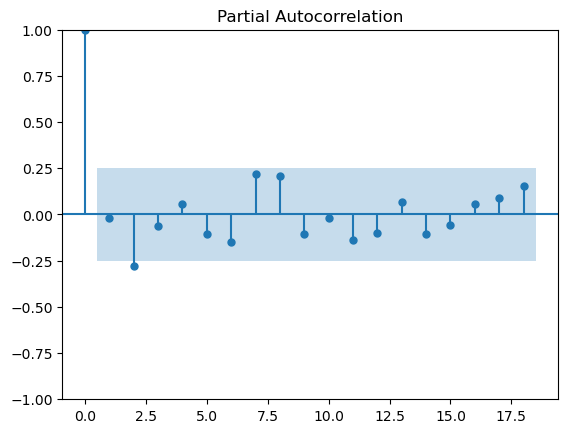

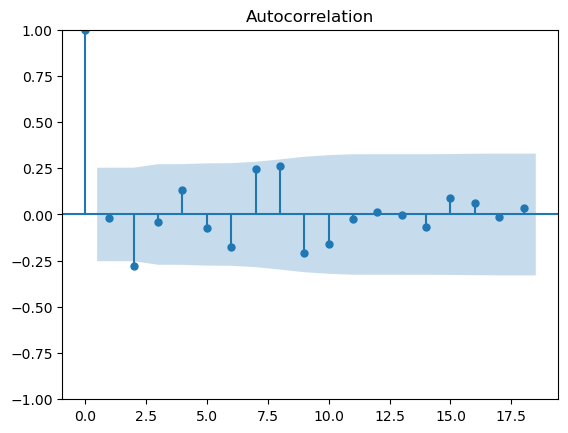

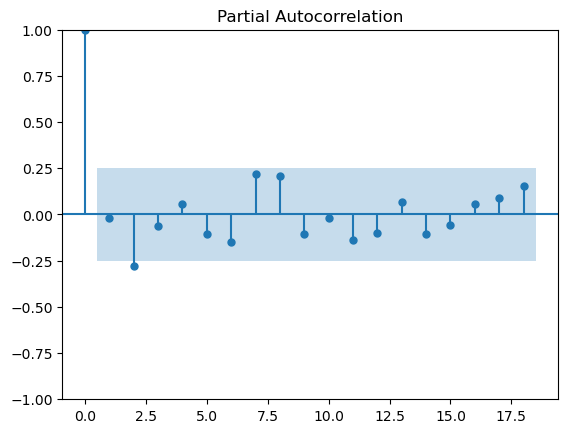

In [56]:
plot_acf(diff_df)
plot_pacf(diff_df)

# Single Exponential Smoothing

In [57]:
single_exp = SimpleExpSmoothing(train_df).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(18)

c:\Users\Septa Dwi cahya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='year'>

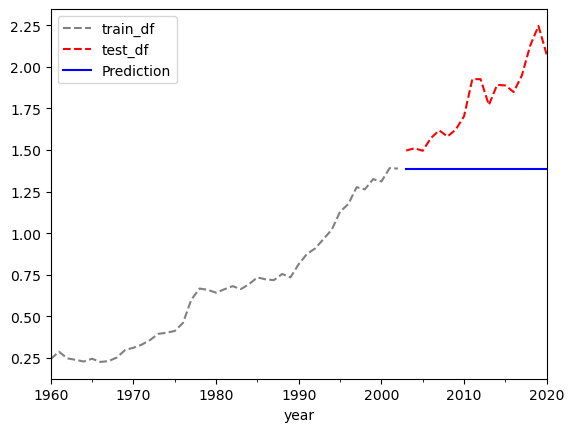

In [58]:
train_df['CO2'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['CO2'].plot(style='--', color='r', legend=True, label='test_df')
single_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [59]:
print('Train RMSE : ', mean_squared_error(train_df, single_exp_train_pred)**0.5)
print('Test RMSE : ', mean_squared_error(test_df, single_exp_test_pred)**0.5)
print('Train MAPE : ', mean_absolute_percentage_error(train_df, single_exp_train_pred))
print('Test MAPE : ', mean_absolute_percentage_error(test_df, single_exp_test_pred))

Train RMSE :  0.04671996820766827
Test RMSE :  0.4601039039170674
Train MAPE :  0.05906032285428932
Test MAPE :  0.21289543642216988


# Double Exponential Smoothing

In [60]:
double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=15, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(18)

c:\Users\Septa Dwi cahya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='year'>

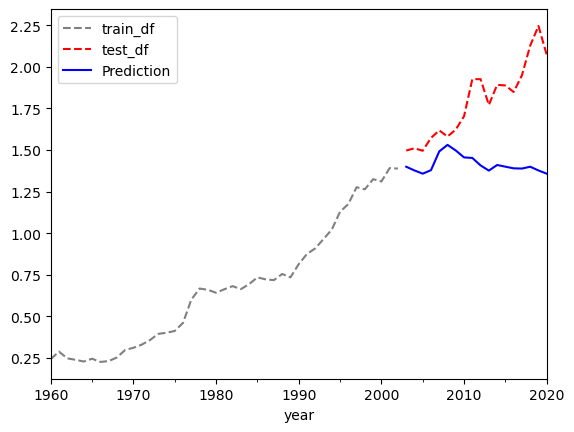

In [61]:
train_df['CO2'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['CO2'].plot(style='--', color='r', legend=True, label='test_df')
double_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [62]:
print('Train RMSE : ', mean_squared_error(train_df, double_exp_train_pred)**0.5)
print('Test RMSE : ', mean_squared_error(test_df, double_exp_test_pred)**0.5)
print('Train MAPE : ', mean_absolute_percentage_error(train_df, double_exp_train_pred))
print('Test MAPE : ', mean_absolute_percentage_error(test_df, double_exp_test_pred))

Train RMSE :  0.05647408431699318
Test RMSE :  0.44800955334490167
Train MAPE :  0.0865788858353108
Test MAPE :  0.19777575258211166


# ARIMA

In [63]:
ar = ARIMA(train_df, order=(19,1,19)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(18)

c:\Users\Septa Dwi cahya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Septa Dwi cahya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Septa Dwi cahya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Septa Dwi cahya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Septa Dwi cahya\anaconda3\

<Axes: xlabel='year'>

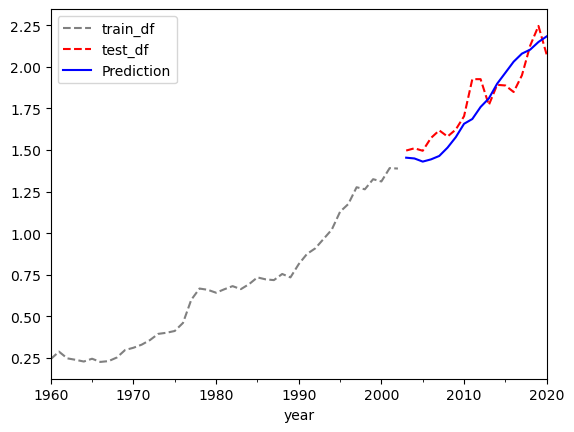

In [64]:
train_df['CO2'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['CO2'].plot(style='--', color='r', legend=True, label='test_df')
ar_test_pred.plot(color='b', legend=True, label='Prediction')

In [65]:
print('Train RMSE : ', mean_squared_error(train_df, ar_train_pred)**0.5)
print('Test RMSE : ', mean_squared_error(test_df, ar_test_pred)**0.5)
print('Train MAPE : ', mean_absolute_percentage_error(train_df, ar_train_pred))
print('Test MAPE : ', mean_absolute_percentage_error(test_df, ar_test_pred))

Train RMSE :  0.04708748648562582
Test RMSE :  0.1114733127306149
Train MAPE :  0.0662988649030156
Test MAPE :  0.05207679949460541


# Perbandingan Algoritma

In [66]:
comparison_df = pd.DataFrame(data=[
    ['Single Exp Smoothing', mean_squared_error(test_df, single_exp_test_pred)**0.5, mean_absolute_percentage_error(test_df, single_exp_test_pred)],
    ['Double Exp Smoothing', mean_squared_error(test_df, double_exp_test_pred)**0.5, mean_absolute_percentage_error(test_df, double_exp_test_pred)],
    ['ARIMA', mean_squared_error(test_df, ar_test_pred)**0.5, mean_absolute_percentage_error(test_df, ar_test_pred)]
    ],
    columns=['Model', 'RMSE', 'MAPE'])
comparison_df.set_index('Model', inplace=True)

In [67]:
comparison_df.sort_values(by='RMSE')

,RMSE,MAPE
Model,,
ARIMA,0.111473,0.052077
Double Exp Smoothing,0.448010,0.197776
Single Exp Smoothing,0.460104,0.212895


In [68]:
ar1 = ARIMA(df, order=(19,1,19)).fit()
ar1_pred = ar1.forecast(25)

c:\Users\Septa Dwi cahya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Septa Dwi cahya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Septa Dwi cahya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Septa Dwi cahya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Septa Dwi cahya\anaconda3\Lib\site-packages\statsmodels\base\model.py:

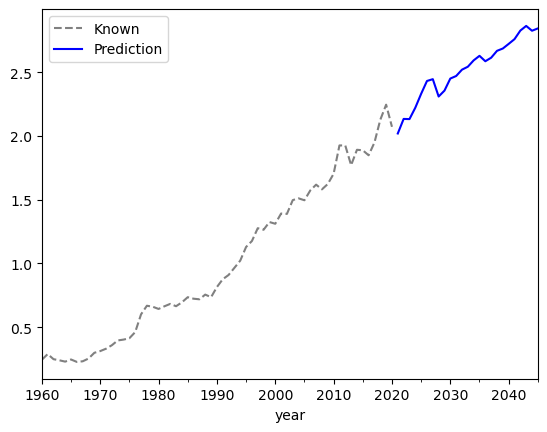

In [69]:
df['CO2'].plot(style='--', color='gray', legend=True, label='Known')
ar1_pred.plot(color='b', legend=True, label='Prediction')
plt.show()